<a href="https://colab.research.google.com/github/DmitryParshin1/1.10.2022/blob/master/Pandas_3_less_leksion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Будем работать с датасетом по оттоку клиентов из банка<br> https://www.kaggle.com/datasets/shubh0799/churn-modelling,<br> но датасет из себя будет представлять две таблицы:<br>
<br>
Личные данные клиента<br>
<br>
CustomerId - Уникальный идентификатор клиента<br>
Surname - Фамилия клиента<br>
Geography - Из какой страны клиент<br>
Gender - Пол клиента<br>
Age - Возраст клиента<br>
EstimatedSalary - Предположительная зарплата клиента<br>
Данные по поведению клиента в банке<br>
<br>
CustomerId - Уникальный идентификатор клиента<br>
CustomerId - Уникальный идентификатор клиента<br>
Tenure - Сколько лет человек является клиентом банка<br>
Balance - Баланс счета<br>
NumOfProducts - Количество открытых продуктов<br>
HasCrCard - Есть ли у клиента кредитная карта<br>
IsActiveMember - Является ли клиент активные участником<br>
Exited - Уйдет ли человек в отток<br>

In [9]:
import pandas as pd

In [10]:
users = pd.read_csv('Churn_Modelling.csv')
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
users.shape

(10000, 15)

## Создание новых признаков

In [16]:
users['new_feature'] = 0
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age (days) 3,new_feature
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,15330,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,14965,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,15330,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,14235,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,15695,0


In [17]:
users['Age (days)'] = users['Age'] * 365
users.head()
# пересчтываем года в дни (таблица не работает)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age (days) 3,new_feature,Age (days)
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,15330,0,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,14965,0,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,15330,0,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,14235,0,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,15695,0,15695


### пересчтываем года в дни (таблица не работает)

In [18]:
for i, row in users.iloc[:2].iterrows():
    print(row)
    print('__' * 30)
# проходимся циклом,  берем 2-е первые строчки и выводим в виде распиисанной таблице

RowNumber                  1
CustomerId          15634602
Surname             Hargrave
CreditScore              619
Geography             France
Gender                Female
Age                       42
Tenure                     2
Balance                  0.0
NumOfProducts              1
HasCrCard                  1
IsActiveMember             1
EstimatedSalary    101348.88
Exited                     1
Age (days) 3           15330
new_feature                0
Age (days)             15330
Name: 0, dtype: object
____________________________________________________________
RowNumber                  2
CustomerId          15647311
Surname                 Hill
CreditScore              608
Geography              Spain
Gender                Female
Age                       41
Tenure                     1
Balance             83807.86
NumOfProducts              1
HasCrCard                  0
IsActiveMember             1
EstimatedSalary    112542.58
Exited                     0
Age (days) 3     

### проходимся циклом,  берем 2-е первые строчки и выводим в виде распиисанной таблице

In [19]:
age_days = []

for i, row in users.iterrows():
    age_days.append(row['Age'] * 365)

age_days[:10]

# пересчтываем возраст в дни и выводм первые 10 в виде списка

[15330, 14965, 15330, 14235, 15695, 16060, 18250, 10585, 16060, 9855]

### пересчтываем возраст в дни и выводм первые 10 в виде списка

In [20]:
users['Age (days) 2'] = age_days
users.head()
# выводит в тааблице Age (days) 2 с посчитанным днями

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age (days) 3,new_feature,Age (days),Age (days) 2
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,15330,0,15330,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,14965,0,14965,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,15330,0,15330,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,14235,0,14235,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,15695,0,15695,15695


### выводит в тааблице Age (days) 2 с посчитанным днями

In [21]:
def age_to_days(x):
    return x * 365

users['Age (days) 3'] = users['Age'].apply(age_to_days)
users.head()
# apply - вызывает функцию у конкретного столбца (так же можно передать всю таблицу)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age (days) 3,new_feature,Age (days),Age (days) 2
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,15330,0,15330,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,14965,0,14965,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,15330,0,15330,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,14235,0,14235,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,15695,0,15695,15695


### apply - вызывает функцию у конкретного столбца (так же можно передать всю таблицу)

In [22]:
import time
from tqdm import tqdm
tqdm.pandas()


def age_to_days(x):
    time.sleep(0.001)
    return x * 365

users['Age'].progress_apply(age_to_days)
# progress_apply - tqdm - показывает время выолнения операции

100%|██████████| 10000/10000 [00:11<00:00, 889.43it/s]


0       15330
1       14965
2       15330
3       14235
4       15695
        ...  
9995    14235
9996    12775
9997    13140
9998    15330
9999    10220
Name: Age, Length: 10000, dtype: int64

### progress_apply - tqdm - показывает время выолнения операции

## Удаление признаков

In [23]:
users.drop(columns='new_feature')
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age (days) 3,new_feature,Age (days),Age (days) 2
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,15330,0,15330,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,14965,0,14965,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,15330,0,15330,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,14235,0,14235,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,15695,0,15695,15695


### удаляем значения

In [24]:
users = users.drop(columns='new_feature')
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age (days) 3,Age (days),Age (days) 2
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,15330,15330,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,14965,14965,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,15330,15330,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,14235,14235,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,15695,15695,15695


### удаляем колонку

In [25]:
users['new_feature'] = 0

In [26]:
users.drop(columns='new_feature', inplace=True)
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age (days) 3,Age (days),Age (days) 2
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,15330,15330,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,14965,14965,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,15330,15330,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,14235,14235,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,15695,15695,15695


### удаляет колонку - еще один метод

In [27]:
users.drop(columns=['Age (days)', 'Age (days) 2', 'Age (days) 3'], inplace=True)
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### удаляет несколько колонок

## Изменение существующих признаков

#### .loc

In [28]:
users['target'] = 0
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,target
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


### создаем новую колонку

In [29]:
users.loc[users['Geography'] == 'France']

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,target
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0


### делаем выборку по Франции (LOC - берет по ключу!!!)

In [30]:
users.loc[users['Geography'] == 'France', 'target']

0       0
2       0
3       0
6       0
8       0
       ..
9994    0
9995    0
9996    0
9997    0
9999    0
Name: target, Length: 5014, dtype: int64

### показывает 0 у Франции

In [31]:
users[users['Geography'] == 'France']['target'] = 1
users.head()

<ipython-input-31-b763340dfd50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users[users['Geography'] == 'France']['target'] = 1


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,target
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


### показывают ошибку без лока (перепизывается копия), сама таблица остается в пежнем виде

In [32]:
users.loc[users['Geography'] == 'France', 'target'] = 1
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,target
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


### с LOC -  Франция таргет переходит на 1 (сама таблица меняется, не копия)

#### .replace

In [33]:
users['Gender'].replace({'Female': 'F', 'Male': 'M'}, inplace=True)
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,target
0,1,15634602,Hargrave,619,France,F,42,2,0.00,1,1,1,101348.88,1,1
1,2,15647311,Hill,608,Spain,F,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,F,42,8,159660.80,3,1,0,113931.57,1,1
3,4,15701354,Boni,699,France,F,39,1,0.00,2,0,0,93826.63,0,1
4,5,15737888,Mitchell,850,Spain,F,43,2,125510.82,1,1,1,79084.10,0,0


## меняем в колонке Gender - на F и M 

## Методы агрегации

In [34]:
users['Age'].agg(['min', 'max'])

min    18
max    92
Name: Age, dtype: int64

## ищем минимальный и максимальный возраст

In [35]:
users.agg({
    'Age': ['min', 'max'],
    'EstimatedSalary': 'mean'
})

,Age,EstimatedSalary
min,18.0,NaN
max,92.0,NaN
mean,NaN,100090.239881


## можно передавать кортежи

In [36]:
users.agg(
    min_age=('Age', 'min'),
    max_age=('Age', 'max'),
    mean_salary=('EstimatedSalary', 'mean')
)

,Age,EstimatedSalary
min_age,18.0,NaN
max_age,92.0,NaN
mean_salary,NaN,100090.239881


## даем названием колонкам

## Методы объединения

In [41]:
bank = pd.read_csv('Churn_Modelling.csv')
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
bank.shape

(10000, 14)

In [43]:
merged = users.merge(bank, left_on='CustomerId', right_on='CustomerId')
merged.head()

,RowNumber_x,CustomerId,Surname_x,CreditScore_x,Geography_x,Gender_x,Age_x,Tenure_x,Balance_x,NumOfProducts_x,...,Geography_y,Gender_y,Age_y,Tenure_y,Balance_y,NumOfProducts_y,HasCrCard_y,IsActiveMember_y,EstimatedSalary_y,Exited_y
0,1,15634602,Hargrave,619,France,F,42,2,0.00,1,...,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,F,41,1,83807.86,1,...,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,F,42,8,159660.80,3,...,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,F,39,1,0.00,2,...,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,F,43,2,125510.82,1,...,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## соединяем таблицы по ID метод merge
### так же если ID одинаковый то можно вызвать метод посто через ON
### merged = users.merge(bank, on='CustomerId')

In [44]:
users_id = users.set_index('CustomerId')
users_id.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,target
CustomerId,,,,,,,,,,,,,,
15634602,1,Hargrave,619,France,F,42,2,0.00,1,1,1,101348.88,1,1
15647311,2,Hill,608,Spain,F,41,1,83807.86,1,0,1,112542.58,0,0
15619304,3,Onio,502,France,F,42,8,159660.80,3,1,0,113931.57,1,1
15701354,4,Boni,699,France,F,39,1,0.00,2,0,0,93826.63,0,1
15737888,5,Mitchell,850,Spain,F,43,2,125510.82,1,1,1,79084.10,0,0


## чтобы объединить через  join - создаем ID у таблиц

In [45]:
bank_id = bank.set_index('CustomerId')
bank_id.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,,
15634602,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [48]:
bank_id.join(users_id).head()
## соединяем таблцы по ID

In [48]:
bank_id.join(users_id).reset_index().head()
## чтобы CustomerId - был снова признак (часть таблицы)

In [48]:
bank.shape

(10000, 14)

## Атрибут how

In [49]:
toy_df1 = pd.DataFrame({
    'col_1': [1, 2, 3],
    'col_2': [9, 9, 9]
})

toy_df2 = pd.DataFrame({
    'col_1': [3, 4],
    'col_3': [0, 0]
})

display(toy_df1, toy_df2)

,col_1,col_2
0,1,9
1,2,9
2,3,9


,col_1,col_3
0,3,0
1,4,0


In [50]:
toy_df1.merge(toy_df2, how='left')

,col_1,col_2,col_3
0,1,9,NaN
1,2,9,NaN
2,3,9,0.0


In [51]:
toy_df1.merge(toy_df2, how='right')

,col_1,col_2,col_3
0,3,9.0,0
1,4,NaN,0


In [52]:
toy_df1.merge(toy_df2, how='inner')

,col_1,col_2,col_3
0,3,9,0


In [53]:
toy_df1.merge(toy_df2, how='outer')

,col_1,col_2,col_3
0,1,9.0,NaN
1,2,9.0,NaN
2,3,9.0,0.0
3,4,NaN,0.0


## Left

In [54]:
merged_left = bank.merge(users, on='CustomerId', how='left')
merged_left.shape

(10000, 28)

## банк слева, справа пользователи 

In [55]:
merged_left.isna().sum()

RowNumber_x          0
CustomerId           0
Surname_x            0
CreditScore_x        0
Geography_x          0
Gender_x             0
Age_x                0
Tenure_x             0
Balance_x            0
NumOfProducts_x      0
HasCrCard_x          0
IsActiveMember_x     0
EstimatedSalary_x    0
Exited_x             0
RowNumber_y          0
Surname_y            0
CreditScore_y        0
Geography_y          0
Gender_y             0
Age_y                0
Tenure_y             0
Balance_y            0
NumOfProducts_y      0
HasCrCard_y          0
IsActiveMember_y     0
EstimatedSalary_y    0
Exited_y             0
target               0
dtype: int64

## смотрим пропускии методом isna, и суммируем по колонкам

In [57]:
merged_left[merged_left['Age'].isna()]
## чтобы посмотреть в какой конкретных колонках есть пропуски

In [57]:
users[users['CustomerId'] == 15682355]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,target
9998,9999,15682355,Sabbatini,772,Germany,M,42,3,75075.31,2,1,0,92888.52,1,0


##  смотрим совпадения по ID

## right

In [58]:
merged_right = bank.merge(users, on='CustomerId', how='right')
merged_right.shape

(10000, 28)

In [59]:
merged_right.isna().sum()

RowNumber_x          0
CustomerId           0
Surname_x            0
CreditScore_x        0
Geography_x          0
Gender_x             0
Age_x                0
Tenure_x             0
Balance_x            0
NumOfProducts_x      0
HasCrCard_x          0
IsActiveMember_x     0
EstimatedSalary_x    0
Exited_x             0
RowNumber_y          0
Surname_y            0
CreditScore_y        0
Geography_y          0
Gender_y             0
Age_y                0
Tenure_y             0
Balance_y            0
NumOfProducts_y      0
HasCrCard_y          0
IsActiveMember_y     0
EstimatedSalary_y    0
Exited_y             0
target               0
dtype: int64

In [60]:
merged_right[merged_right['CreditScore'].isna()]

In [ ]:
bank[bank['CustomerId'] == 15611325]

## inner

In [ ]:
merged_inner = bank.merge(users, on='CustomerId', how='inner')
merged_inner.shape

In [ ]:
merged_inner.isna().sum()

## outer

In [ ]:
merged_outer = bank.merge(users, on='CustomerId', how='outer')
merged_outer.shape

In [ ]:
merged_outer.isna().sum()

# Методы группировок

## groupby

In [61]:
toy_df = pd.DataFrame({
    'client_id': [1, 2, 2, 3, 1, 1],
    'item': ['chocolate', 'cheese', 'ham', 'candy', 'chair', 'book'],
    'price': [68, 280, 302, 39, 2099, 1089]
})

toy_df

,client_id,item,price
0,1,chocolate,68
1,2,cheese,280
2,2,ham,302
3,3,candy,39
4,1,chair,2099
5,1,book,1089


In [62]:
grouped = toy_df.groupby('client_id')
grouped

## объединили клентов по ID (1, 2, 3)

In [63]:
grouped.groups

{1: [0, 4, 5], 2: [1, 2], 3: [3]}

## что клиент купил - разбито по круппам

In [64]:
grouped.sum()

<ipython-input-64-f22bc4e4f731>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped.sum()


,price
client_id,
1,3256
2,582
3,39


## что клиент купил - разбито по сумме

In [65]:
grouped.agg({'price': ['sum', 'min', 'max']})

price           
            sum  min   max
client_id                 
1          3256   68  2099
2           582  280   302
3            39   39    39

## что клиент купил - разбито по min, max и сумме

In [66]:
users.groupby('Geography').agg({'Age': ['mean'], 'EstimatedSalary': ['min']})

,Age,EstimatedSalary
,mean,min
Geography,,
France,38.511767,90.07
Germany,39.771622,11.58
Spain,38.890997,417.41


## группируем по географии, смотрим средний возраст, минимальную з/п 

## pivot_table

In [67]:
toy_df

,client_id,item,price
0,1,chocolate,68
1,2,cheese,280
2,2,ham,302
3,3,candy,39
4,1,chair,2099
5,1,book,1089


In [68]:
toy_df.pivot_table(index='client_id',
                   values='price',
                   aggfunc='sum')

,price
client_id,
1,3256
2,582
3,39


## группировка pivot_table

In [69]:
users.pivot_table(index='Geography',
                  aggfunc={'Age': ['mean'], 'EstimatedSalary': 'min'})


,Age,EstimatedSalary
,mean,min
Geography,,
France,38.511767,90.07
Germany,39.771622,11.58
Spain,38.890997,417.41


In [70]:
users.pivot_table(index='Geography',
                  columns='Gender', 
                  values='EstimatedSalary',
                  aggfunc='mean',
                  margins=True,
                  margins_name='Total')

Gender,F,M,Total
Geography,,,
France,99564.252755,100174.252495,99899.180814
Germany,102446.424124,99905.033959,101113.435102
Spain,100734.107475,98425.687680,99440.572281
Total,100601.541382,99664.576931,100090.239881


## crosstab

In [71]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'])

Gender,F,M
Geography,,
France,2261,2753
Germany,1193,1316
Spain,1089,1388


## группировка берет значеня из Пандас, считает повторения 

In [72]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            values=users['EstimatedSalary'],
            aggfunc='mean')

Gender,F,M
Geography,,
France,99564.252755,100174.252495
Germany,102446.424124,99905.033959
Spain,100734.107475,98425.687680


## чтобы не подсчитывать количество есть функция aggfunc

In [73]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            normalize='all')

Gender,F,M
Geography,,
France,0.2261,0.2753
Germany,0.1193,0.1316
Spain,0.1089,0.1388


## высчитывает процентное соотношение - normalize

In [74]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            normalize='index')

Gender,F,M
Geography,,
France,0.450937,0.549063
Germany,0.475488,0.524512
Spain,0.439645,0.560355


## высчитывает процентное соотношение - normalize ='index' - по строчкам

In [75]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            normalize='columns')

Gender,F,M
Geography,,
France,0.497689,0.504490
Germany,0.262602,0.241158
Spain,0.239709,0.254352


высчитывает процентное соотношение - normalize ='columns' - по столбцам

## Встроенные визуализации

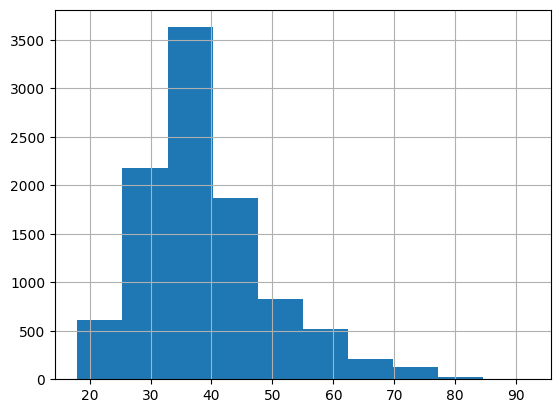

In [76]:
users['Age'].hist();

## гистограмма

In [77]:
data = users.groupby('Gender').count()['Age']
data.name = 'Gender'
data

Gender
F    4543
M    5457
Name: Gender, dtype: int64

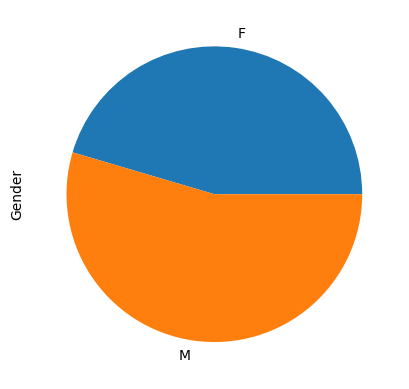

In [78]:
data.plot.pie(y='Gender');

### пироговая диаграмма (но сначала надо подсчитать соотношение)
### data = users.groupby('Gender').count()['Age'] (чуть выше)

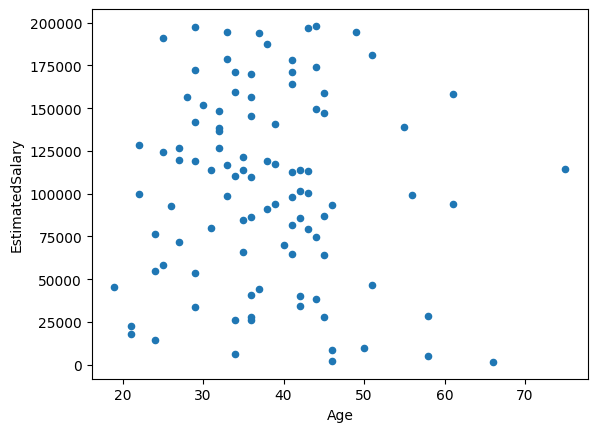

In [79]:
users.iloc[:100].plot.scatter(x='Age', y='EstimatedSalary');

## скатер плоты - пересечение точек на 2-х признаках

In [80]:
data = bank.groupby('Tenure').count()['Balance']
data.name = 'num_clients'
data

Tenure
0      413
1     1035
2     1048
3     1009
4      989
5     1012
6      967
7     1028
8     1025
9      984
10     490
Name: num_clients, dtype: int64

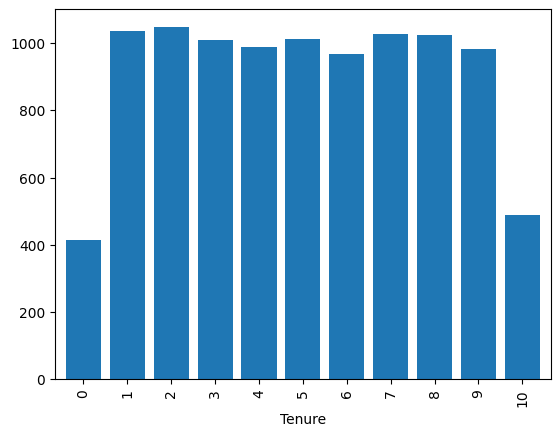

In [81]:
data.plot.bar(width=0.8);

### столбц, но сначала посчитать формулу что будем выводить
### data = bank.groupby('Tenure').count()['Balance']
### группируем по времени проведенном в банке Tenure, подсчтываем количество count()['Balance']